## Techniques for Feature Selection and Parameter Optimization

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import titanic data using pandas

Modified version of the "Titanic" data can be found at: http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/titanic-trimmed.csv. Original unmodified Titanic data is available at <a href="http://lib.stat.cmu.edu/S/Harrell/data/ascii/titanic.txt">CMU StatLib</a>.

In [3]:
url = "../data/titanic-trimmed.csv"
titanic = pd.read_csv(url)
titanic.head(10)

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1st,1,female,29.0,0,0,211.337494,Southampton
1,2,1st,1,male,NaN,1,2,151.550003,Southampton
2,3,1st,0,female,2.0,1,2,151.550003,Southampton
3,4,1st,0,male,30.0,1,2,151.550003,Southampton
4,5,1st,0,female,25.0,1,2,151.550003,Southampton
5,6,1st,1,male,48.0,0,0,26.549999,Southampton
6,7,1st,1,female,63.0,1,0,77.958298,Southampton
7,8,1st,0,male,39.0,0,0,0.000000,Southampton
8,9,1st,1,female,53.0,2,0,51.479198,Southampton
9,10,1st,0,male,71.0,0,0,49.504200,Cherbourg


In [4]:
titanic.describe(include="all")

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309,1309.000000,1309,1045.000000,1309.000000,1309.000000,1308.000000,1307
unique,NaN,3,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,3rd,NaN,male,NaN,NaN,NaN,NaN,Southampton
freq,NaN,709,NaN,843,NaN,NaN,NaN,NaN,914
mean,655.000000,NaN,0.381971,NaN,29.908852,0.498854,0.385027,33.295479,NaN
std,378.020061,NaN,0.486055,NaN,14.392485,1.041658,0.865560,51.758669,NaN
min,1.000000,NaN,0.000000,NaN,0.166700,0.000000,0.000000,0.000000,NaN
25%,328.000000,NaN,0.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,655.000000,NaN,0.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,982.000000,NaN,1.000000,NaN,39.000000,1.000000,0.000000,31.275000,NaN


#### Handling missing variables

In [5]:
titanic[titanic.age.isnull()].shape

(264, 9)

In [6]:
age_mean = titanic.age.mean()
titanic.age.fillna(age_mean, axis=0, inplace=True)
titanic.dropna(axis=0, inplace=True)

In [7]:
titanic.shape

(1306, 9)

In [8]:
titanic.set_index('pid', drop=True, inplace=True)
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pid,,,,,,,,
1,1st,1,female,29.000000,0,0,211.337494,Southampton
2,1st,1,male,29.908852,1,2,151.550003,Southampton
3,1st,0,female,2.000000,1,2,151.550003,Southampton
4,1st,0,male,30.000000,1,2,151.550003,Southampton
5,1st,0,female,25.000000,1,2,151.550003,Southampton


#### Creating dummy variables for categorical features

In [9]:
titanic_ssf = pd.get_dummies(titanic)
titanic_ssf.head(10)

,survived,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,,
1,1,29.000000,0,0,211.337494,1,0,0,1,0,0,0,1
2,1,29.908852,1,2,151.550003,1,0,0,0,1,0,0,1
3,0,2.000000,1,2,151.550003,1,0,0,1,0,0,0,1
4,0,30.000000,1,2,151.550003,1,0,0,0,1,0,0,1
5,0,25.000000,1,2,151.550003,1,0,0,1,0,0,0,1
6,1,48.000000,0,0,26.549999,1,0,0,0,1,0,0,1
7,1,63.000000,1,0,77.958298,1,0,0,1,0,0,0,1
8,0,39.000000,0,0,0.000000,1,0,0,0,1,0,0,1
9,1,53.000000,2,0,51.479198,1,0,0,1,0,0,0,1


In [10]:
titanic_names = titanic_ssf.columns.values
titanic_names

array(['survived', 'age', 'sibsp', 'parch', 'fare', 'pclass_1st',
       'pclass_2nd', 'pclass_3rd', 'sex_female', 'sex_male',
       'embarked_Cherbourg', 'embarked_Queenstown',
       'embarked_Southampton'], dtype=object)

In [11]:
y = titanic_ssf['survived']
X = titanic_ssf[titanic_names[1:]]
X.head()

,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,
1,29.000000,0,0,211.337494,1,0,0,1,0,0,0,1
2,29.908852,1,2,151.550003,1,0,0,0,1,0,0,1
3,2.000000,1,2,151.550003,1,0,0,1,0,0,0,1
4,30.000000,1,2,151.550003,1,0,0,0,1,0,0,1
5,25.000000,1,2,151.550003,1,0,0,1,0,0,0,1


In [12]:
titanic_ssf.describe()

,survived,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
count,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000
mean,0.381317,29.854661,0.50000,0.385911,33.223956,0.245789,0.212098,0.542113,0.355283,0.644717,0.206738,0.094181,0.699081
std,0.485896,12.812320,1.04258,0.866357,51.765986,0.430719,0.408950,0.498414,0.478782,0.478782,0.405121,0.292192,0.458833
min,0.000000,0.166700,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.00000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.908852,0.00000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.00000,0.000000,31.275000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.00000,9.000000,512.329224,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
titanic_ssf.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,1306.0,0.381317,0.485896,0.0000,0.0000,0.000000,1.000,1.000000
age,1306.0,29.854661,12.812320,0.1667,22.0000,29.908852,35.000,80.000000
sibsp,1306.0,0.500000,1.042580,0.0000,0.0000,0.000000,1.000,8.000000
parch,1306.0,0.385911,0.866357,0.0000,0.0000,0.000000,0.000,9.000000
fare,1306.0,33.223956,51.765986,0.0000,7.8958,14.454200,31.275,512.329224
pclass_1st,1306.0,0.245789,0.430719,0.0000,0.0000,0.000000,0.000,1.000000
pclass_2nd,1306.0,0.212098,0.408950,0.0000,0.0000,0.000000,0.000,1.000000
pclass_3rd,1306.0,0.542113,0.498414,0.0000,0.0000,1.000000,1.000,1.000000
sex_female,1306.0,0.355283,0.478782,0.0000,0.0000,0.000000,1.000,1.000000
sex_male,1306.0,0.644717,0.478782,0.0000,0.0000,1.000000,1.000,1.000000


#### Build the training and testing dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [16]:
# Now let's train the decision tree on the training data

from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)


#### A versatile function to measure performance of a calssification model

In [18]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print ("Confussion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

In [19]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.737 

Classification report
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       161
           1       0.66      0.65      0.66       101

    accuracy                           0.74       262
   macro avg       0.72      0.72      0.72       262
weighted avg       0.74      0.74      0.74       262
 



### Feature Selection

#### Select the top 30% of the most important features, using a chi2 test

In [20]:
from sklearn import feature_selection

In [21]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=30)
X_train_fs = fs.fit_transform(X_train, y_train)

In [22]:
np.set_printoptions(suppress=True, precision=2, linewidth=80)
print (fs.get_support())
print (fs.scores_)

[False False False  True  True False False  True  True False False False]
[  17.19    0.     22.34 5185.44   61.98    1.28   35.15  189.1   102.94
   27.57    0.01    8.16]


In [23]:
X.columns.values

array(['age', 'sibsp', 'parch', 'fare', 'pclass_1st', 'pclass_2nd',
       'pclass_3rd', 'sex_female', 'sex_male', 'embarked_Cherbourg',
       'embarked_Queenstown', 'embarked_Southampton'], dtype=object)

In [24]:
print (X.columns[fs.get_support()].values)

['fare' 'pclass_1st' 'sex_female' 'sex_male']


In [25]:
for i in range(len(X.columns.values)):
    if fs.get_support()[i]:
        print (X.columns.values[i],'\t', fs.scores_[i])

fare 	 5185.44064552262
pclass_1st 	 61.98414742146332
sex_female 	 189.1011725770034
sex_male 	 102.94265016026222


In [26]:
print (X_train_fs)

[[31.39  0.    0.    1.  ]
 [15.05  0.    0.    1.  ]
 [91.08  1.    0.    1.  ]
 ...
 [21.    0.    1.    0.  ]
 [31.5   0.    0.    1.  ]
 [ 7.9   0.    0.    1.  ]]


#### Evaluate performance with the new feature set on test data

In [27]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.821 



#### To do feature selection more systematically, we need to find the best percentile using cross-validation

1 0.7012179487179487
6 0.7012179487179487
11 0.7614102564102565
16 0.7614102564102565
21 0.7614102564102565
26 0.7614102564102565
31 0.7585439560439561
36 0.7585439560439561
41 0.7690934065934065
46 0.7642948717948719
51 0.7642948717948719
56 0.7556776556776558
61 0.7576007326007326
66 0.7490201465201466
71 0.7490018315018316
76 0.7576465201465201
81 0.7461446886446887
86 0.7480311355311355
91 0.7538003663003663
96 0.7509432234432234
8
Optimal percentile of features:41 

Optimal number of features:4 



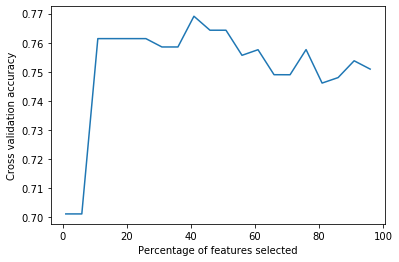

In [34]:
from sklearn import model_selection
dt = tree.DecisionTreeClassifier(criterion='entropy')

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = model_selection.cross_val_score(dt, X_train_fs, y_train, cv=5)
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print(optimal_percentile[0])
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(X.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

### Evaluate our best number of features on the test set

In [35]:
fs = feature_selection.SelectKBest(feature_selection.chi2, optimal_num_features)
X_train_fs = fs.fit_transform(X_train, y_train)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.821 

Classification report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.76      0.78      0.77       101

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262
 



### Model selection

#### Exploring and comparing model parameters

In [36]:
print (dt.get_params())

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


#### Let's first focus on "criterion' parameter and find the best one

In [39]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
scores = model_selection.cross_val_score(dt, X_train_fs, y_train, cv=5)
print ("Entropy criterion accuracy on cv: {0:.3f}".format(scores.mean()))
dt = tree.DecisionTreeClassifier(criterion='gini')
scores = model_selection.cross_val_score(dt, X_train_fs, y_train, cv=5)
print ("Gini criterion accuracy on cv: {0:.3f}".format(scores.mean()))


Entropy criterion accuracy on cv: 0.759
Gini criterion accuracy on cv: 0.758


In [40]:
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.821 

Classification report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.76      0.78      0.77       101

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262
 



In [41]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.744 



#### Another parameter of decision tree that can have an impact on accuracy is 'max-depth'

In [42]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(max_depth=5)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.790 



#### But, again, we need a more systematic way to explore the space of values for each parameter. The following is a general function that performs cross-validation using a range of values for a specified parameter of a model

In [47]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        #cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        cv = KFold(n_splits=K)
        cv.get_n_splits(X) 
        KFold(n_splits=K,random_state=None, shuffle=False)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv.split(X)):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

#### Now we can explore the impact of max-depth more systematically

In [45]:
# Let's create an evenly spaced range of numbers in a specified interval
md = np.linspace(1, 40, 20)
md = np.array([int(e) for e in md])
print (md)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 40]


max_depth  =  1
max_depth  =  3
max_depth  =  5
max_depth  =  7
max_depth  =  9
max_depth  =  11
max_depth  =  13
max_depth  =  15
max_depth  =  17
max_depth  =  19
max_depth  =  21
max_depth  =  23
max_depth  =  25
max_depth  =  27
max_depth  =  29
max_depth  =  31
max_depth  =  33
max_depth  =  35
max_depth  =  37
max_depth  =  40


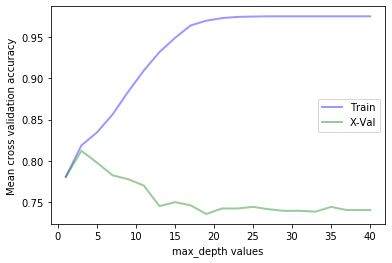

In [48]:
train_scores, test_scores = calc_params(X_train, y_train, dt, md, 'max_depth', 5)

#### max_depth = 3 seems to work best; larger values seem to lead to over-fitting.

In [49]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(max_depth=3)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.798 



#### Another parameter of decision tree that's important is the min number of samples allowed at a leaf node

min_samples_leaf  =  1
min_samples_leaf  =  3
min_samples_leaf  =  5
min_samples_leaf  =  7
min_samples_leaf  =  9
min_samples_leaf  =  11
min_samples_leaf  =  13
min_samples_leaf  =  15
min_samples_leaf  =  17
min_samples_leaf  =  19
min_samples_leaf  =  21
min_samples_leaf  =  23
min_samples_leaf  =  25
min_samples_leaf  =  27
min_samples_leaf  =  30


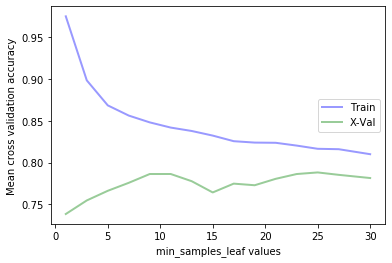

In [50]:
msl = np.linspace(1, 30, 15)
msl = np.array([int(e) for e in msl])

dt = tree.DecisionTreeClassifier(criterion='entropy')
train_scores, test_scores = calc_params(X_train, y_train, dt, msl, 'min_samples_leaf', 5)


### Looks like min_samples_leaf around 11 seems like a good choice

In [51]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(min_samples_leaf=11)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.763 



#### Grid Search allows us to more systemiatically explore different combinations of multiple parameters

In [85]:
import math
from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier()

#print (len(X))
sample_leaf_fractions = np.linspace(0.0005, 0.02, 15)*13.06
#roundup = lambda i: math.ceil(100*i)
#vectorized_ceil = np.vectorize(roundup)
#vectorized_ceil(sample_fractions)
#min_samples_leaf = vectorized_ceil(sample_fractions)
#print(sample_fractions)
#print(min_samples_leaf)
#print(np.linspace(1, 30, 15),)

sample_split_fractions = np.linspace(0.0005, 0.015, 10)*13.06
parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': np.linspace(1, 20, 10),
    'min_samples_leaf': sample_leaf_fractions,
    'min_samples_split': sample_split_fractions
}

gs = GridSearchCV(dt, parameters, verbose=1, cv=5)

In [86]:
%time _ = gs.fit(X_train, y_train)



Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 53.1 s, sys: 0 ns, total: 53.1 s
Wall time: 53.8 s


[Parallel(n_jobs=1)]: Done 15000 out of 15000 | elapsed:   53.7s finished


In [87]:
gs.best_params_, gs.best_score_

({'criterion': 'gini',
  'max_depth': 3.111111111111111,
  'min_samples_leaf': 0.00653,
  'min_samples_split': 0.00653},
 0.8132183908045977)

In [88]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=3, min_samples_split=2)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.798 

Classification report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       161
           1       0.75      0.71      0.73       101

    accuracy                           0.80       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.80      0.80      0.80       262
 

